In [1]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.arima.model import ARIMA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Precipitation modelling
data preparation

In [2]:
dfp = pd.read_csv("/Users/yashikasharma/Downloads/BE000006447.csv")

dfp.head()

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_11026/531543042.py:1: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dfp = pd.read_csv("/Users/yashikasharma/Downloads/BE000006447.csv")


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,BE000006447,1833-01-02,50.8,4.35,104.0,"UCCLE, BE",NaN,NaN,NaN,NaN,-14.0,",,I",-48.0,",,I",NaN,NaN
1,BE000006447,1833-01-03,50.8,4.35,104.0,"UCCLE, BE",NaN,NaN,NaN,NaN,-31.0,",,I",-68.0,",,I",NaN,NaN
2,BE000006447,1833-01-04,50.8,4.35,104.0,"UCCLE, BE",NaN,NaN,NaN,NaN,-39.0,",,I",-68.0,",,I",NaN,NaN
3,BE000006447,1833-01-05,50.8,4.35,104.0,"UCCLE, BE",NaN,NaN,NaN,NaN,-44.0,",,I",-90.0,",,I",NaN,NaN
4,BE000006447,1833-01-06,50.8,4.35,104.0,"UCCLE, BE",NaN,NaN,NaN,NaN,14.0,",,I",-85.0,",,I",NaN,NaN


Data preprocessing

In [3]:
dfp['prcp_observed'] = dfp['PRCP'].notna()
df_model = dfp[dfp['prcp_observed']]
df_model.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,prcp_observed
17166,BE000006447,1880-01-02,50.8,4.35,104.0,"UCCLE, BE",4.0,",,I",NaN,NaN,85.0,",,I",51.0,",,I",NaN,NaN,True
17167,BE000006447,1880-01-03,50.8,4.35,104.0,"UCCLE, BE",0.0,",,I",NaN,NaN,68.0,",,I",25.0,",,I",NaN,NaN,True
17168,BE000006447,1880-01-04,50.8,4.35,104.0,"UCCLE, BE",0.0,",,I",NaN,NaN,40.0,",,I",19.0,",,I",NaN,NaN,True
17169,BE000006447,1880-01-05,50.8,4.35,104.0,"UCCLE, BE",0.0,",,I",NaN,NaN,33.0,",,I",-14.0,",,I",NaN,NaN,True
17170,BE000006447,1880-01-06,50.8,4.35,104.0,"UCCLE, BE",0.0,",,I",NaN,NaN,6.0,",,I",-32.0,",,I",NaN,NaN,True


In [4]:
print(df_model.head())
print(df_model.info())
print(df_model.describe())

           STATION        DATE  LATITUDE  LONGITUDE  ELEVATION       NAME  \
17166  BE000006447  1880-01-02      50.8       4.35      104.0  UCCLE, BE   
17167  BE000006447  1880-01-03      50.8       4.35      104.0  UCCLE, BE   
17168  BE000006447  1880-01-04      50.8       4.35      104.0  UCCLE, BE   
17169  BE000006447  1880-01-05      50.8       4.35      104.0  UCCLE, BE   
17170  BE000006447  1880-01-06      50.8       4.35      104.0  UCCLE, BE   

       PRCP PRCP_ATTRIBUTES  SNWD SNWD_ATTRIBUTES  TMAX TMAX_ATTRIBUTES  TMIN  \
17166   4.0             ,,I   NaN             NaN  85.0             ,,I  51.0   
17167   0.0             ,,I   NaN             NaN  68.0             ,,I  25.0   
17168   0.0             ,,I   NaN             NaN  40.0             ,,I  19.0   
17169   0.0             ,,I   NaN             NaN  33.0             ,,I -14.0   
17170   0.0             ,,I   NaN             NaN   6.0             ,,I -32.0   

      TMIN_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  prcp_

In [5]:
df_model.isnull().sum()

STATION                0
DATE                   0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
NAME                   0
PRCP                   0
PRCP_ATTRIBUTES        0
SNWD               49643
SNWD_ATTRIBUTES    49643
TMAX                1001
TMAX_ATTRIBUTES     1001
TMIN                1851
TMIN_ATTRIBUTES     1851
TAVG               34004
TAVG_ATTRIBUTES    34004
prcp_observed          0
dtype: int64

In [6]:
df_model['DATE'] = pd.to_datetime(df_model['DATE'])
df_model.head()

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_11026/2099627891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['DATE'] = pd.to_datetime(df_model['DATE'])


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,prcp_observed
17166,BE000006447,1880-01-02,50.8,4.35,104.0,"UCCLE, BE",4.0,",,I",NaN,NaN,85.0,",,I",51.0,",,I",NaN,NaN,True
17167,BE000006447,1880-01-03,50.8,4.35,104.0,"UCCLE, BE",0.0,",,I",NaN,NaN,68.0,",,I",25.0,",,I",NaN,NaN,True
17168,BE000006447,1880-01-04,50.8,4.35,104.0,"UCCLE, BE",0.0,",,I",NaN,NaN,40.0,",,I",19.0,",,I",NaN,NaN,True
17169,BE000006447,1880-01-05,50.8,4.35,104.0,"UCCLE, BE",0.0,",,I",NaN,NaN,33.0,",,I",-14.0,",,I",NaN,NaN,True
17170,BE000006447,1880-01-06,50.8,4.35,104.0,"UCCLE, BE",0.0,",,I",NaN,NaN,6.0,",,I",-32.0,",,I",NaN,NaN,True


In [7]:
df_model['TMAX'] = df_model['TMAX'].interpolate()
df_model['TMIN'] = df_model['TMIN'].interpolate()
df_model.isnull().sum()

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_11026/894643987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['TMAX'] = df_model['TMAX'].interpolate()
/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_11026/894643987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['TMIN'] = df_model['TMIN'].interpolate()


STATION                0
DATE                   0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
NAME                   0
PRCP                   0
PRCP_ATTRIBUTES        0
SNWD               49643
SNWD_ATTRIBUTES    49643
TMAX                   0
TMAX_ATTRIBUTES     1001
TMIN                   0
TMIN_ATTRIBUTES     1851
TAVG               34004
TAVG_ATTRIBUTES    34004
prcp_observed          0
dtype: int64

In [8]:
df_model['TAVG'] = (df_model['TMAX'] + df_model['TMIN']) / 2
df_model.isnull().sum()

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_11026/3135204877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['TAVG'] = (df_model['TMAX'] + df_model['TMIN']) / 2


STATION                0
DATE                   0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
NAME                   0
PRCP                   0
PRCP_ATTRIBUTES        0
SNWD               49643
SNWD_ATTRIBUTES    49643
TMAX                   0
TMAX_ATTRIBUTES     1001
TMIN                   0
TMIN_ATTRIBUTES     1851
TAVG                   0
TAVG_ATTRIBUTES    34004
prcp_observed          0
dtype: int64

In [9]:
df_model = df_model.drop(columns=['SNWD', 'prcp_observed', 'STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME'])
attr_cols = [col for col in df_model.columns if 'ATTRIBUTES' in col]
df_model.drop(columns=attr_cols, inplace=True)
df_model.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
TAVG    0
dtype: int64

Feature Engineering

In [10]:
df_model['year'] = df_model['DATE'].dt.year
df_model['month'] = df_model['DATE'].dt.month
df_model['day'] = df_model['DATE'].dt.day
df_model['dayofyear'] = df_model['DATE'].dt.dayofyear
df_model.head()

,DATE,PRCP,TMAX,TMIN,TAVG,year,month,day,dayofyear
17166,1880-01-02,4.0,85.0,51.0,68.0,1880,1,2,2
17167,1880-01-03,0.0,68.0,25.0,46.5,1880,1,3,3
17168,1880-01-04,0.0,40.0,19.0,29.5,1880,1,4,4
17169,1880-01-05,0.0,33.0,-14.0,9.5,1880,1,5,5
17170,1880-01-06,0.0,6.0,-32.0,-13.0,1880,1,6,6


In [11]:
df_model['prcp_lag1'] = df_model['PRCP'].shift(1)
df_model['prcp_lag7'] = df_model['PRCP'].shift(7)

df_model['tavg_lag1'] = df_model['TAVG'].shift(1)
df_model['tavg_lag7'] = df_model['TAVG'].shift(7)
df_model.head()

,DATE,PRCP,TMAX,TMIN,TAVG,year,month,day,dayofyear,prcp_lag1,prcp_lag7,tavg_lag1,tavg_lag7
17166,1880-01-02,4.0,85.0,51.0,68.0,1880,1,2,2,NaN,NaN,NaN,NaN
17167,1880-01-03,0.0,68.0,25.0,46.5,1880,1,3,3,4.0,NaN,68.0,NaN
17168,1880-01-04,0.0,40.0,19.0,29.5,1880,1,4,4,0.0,NaN,46.5,NaN
17169,1880-01-05,0.0,33.0,-14.0,9.5,1880,1,5,5,0.0,NaN,29.5,NaN
17170,1880-01-06,0.0,6.0,-32.0,-13.0,1880,1,6,6,0.0,NaN,9.5,NaN


In [12]:
df_model['prcp_7day_mean'] = df_model['PRCP'].rolling(7).mean()
df_model['tavg_7day_mean'] = df_model['TAVG'].rolling(7).mean()
df_model.head()

,DATE,PRCP,TMAX,TMIN,TAVG,year,month,day,dayofyear,prcp_lag1,prcp_lag7,tavg_lag1,tavg_lag7,prcp_7day_mean,tavg_7day_mean
17166,1880-01-02,4.0,85.0,51.0,68.0,1880,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN
17167,1880-01-03,0.0,68.0,25.0,46.5,1880,1,3,3,4.0,NaN,68.0,NaN,NaN,NaN
17168,1880-01-04,0.0,40.0,19.0,29.5,1880,1,4,4,0.0,NaN,46.5,NaN,NaN,NaN
17169,1880-01-05,0.0,33.0,-14.0,9.5,1880,1,5,5,0.0,NaN,29.5,NaN,NaN,NaN
17170,1880-01-06,0.0,6.0,-32.0,-13.0,1880,1,6,6,0.0,NaN,9.5,NaN,NaN,NaN


In [13]:
df_model.dropna(inplace=True)
df_model.head()

,DATE,PRCP,TMAX,TMIN,TAVG,year,month,day,dayofyear,prcp_lag1,prcp_lag7,tavg_lag1,tavg_lag7,prcp_7day_mean,tavg_7day_mean
17173,1880-01-09,0.0,8.0,-25.0,-8.5,1880,1,9,9,0.0,4.0,-17.0,68.0,0.0,4.214286
17174,1880-01-10,0.0,26.0,-5.0,10.5,1880,1,10,10,0.0,0.0,-8.5,46.5,0.0,-0.928571
17175,1880-01-11,0.0,18.0,-25.0,-3.5,1880,1,11,11,0.0,0.0,10.5,29.5,0.0,-5.642857
17176,1880-01-12,0.0,0.0,-48.0,-24.0,1880,1,12,12,0.0,0.0,-3.5,9.5,0.0,-10.428571
17177,1880-01-13,0.0,6.0,-50.0,-22.0,1880,1,13,13,0.0,0.0,-24.0,-13.0,0.0,-11.714286


Data exploration and visualisation

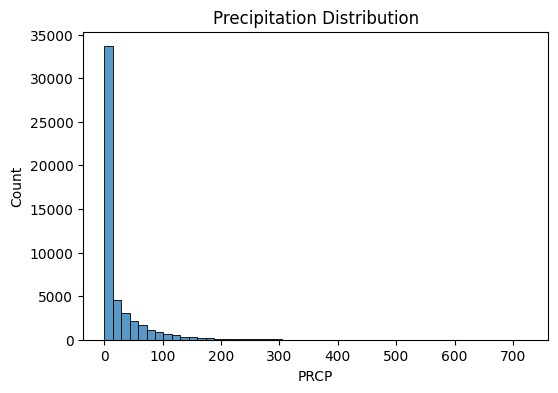

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df_model['PRCP'], bins=50)
plt.title("Precipitation Distribution")
plt.show()

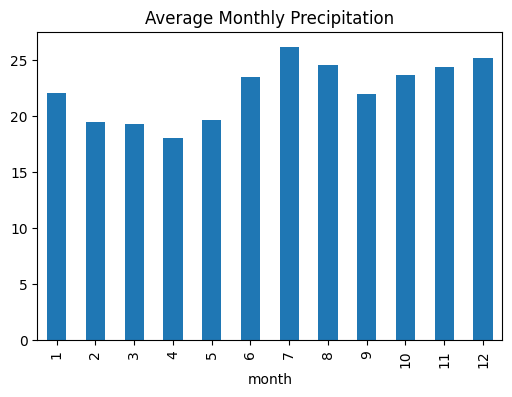

In [15]:
monthly_prcp = df_model.groupby('month')['PRCP'].mean()

plt.figure(figsize=(6,4))
monthly_prcp.plot(kind='bar')
plt.title("Average Monthly Precipitation")
plt.show()

Model selection, training and evaluation

In [16]:
features = [
    'TMAX',	'TMIN',	'TAVG',	'year',	'month', 'day',	'dayofyear', 'prcp_lag1', 'prcp_lag7', 'tavg_lag1',	'tavg_lag7', 'prcp_7day_mean', 'tavg_7day_mean'
]

split_date = '2000-01-01'

train = df_model[df_model['DATE'] < split_date]
test  = df_model[df_model['DATE'] >= split_date]

X_train = train[features]
y_train = train['PRCP']

X_test = test[features]
y_test = test['PRCP']

In [17]:
def evaluate(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return pd.DataFrame([[name, mae, rmse, r2]],
                        columns=["Model", "MAE", "RMSE", "R2"])

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = np.maximum(lr.predict(X_test), 0)

results = evaluate(y_test, y_pred_lr, "Linear Regression")
results

,Model,MAE,RMSE,R2
0,Linear Regression,27.366892,46.209104,0.233956


In [19]:
dt = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=20,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = np.maximum(dt.predict(X_test), 0)

results = pd.concat([results,
                     evaluate(y_test, y_pred_dt, "Decision Tree")])
results

,Model,MAE,RMSE,R2
0,Linear Regression,27.366892,46.209104,0.233956
0,Decision Tree,28.297197,49.502775,0.120860


In [20]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = np.maximum(rf.predict(X_test), 0)

results = pd.concat([results,
                     evaluate(y_test, y_pred_rf, "Random Forest")])
results

,Model,MAE,RMSE,R2
0,Linear Regression,27.366892,46.209104,0.233956
0,Decision Tree,28.297197,49.502775,0.120860
0,Random Forest,27.354653,46.108089,0.237301


In [21]:
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = np.maximum(gbr.predict(X_test), 0)

results = pd.concat([results,
                     evaluate(y_test, y_pred_gbr, "Gradient Boosting")])
results

,Model,MAE,RMSE,R2
0,Linear Regression,27.366892,46.209104,0.233956
0,Decision Tree,28.297197,49.502775,0.120860
0,Random Forest,27.354653,46.108089,0.237301
0,Gradient Boosting,27.701956,49.244996,0.129993


In [22]:
results.sort_values("MAE")

,Model,MAE,RMSE,R2
0,Random Forest,27.354653,46.108089,0.237301
0,Linear Regression,27.366892,46.209104,0.233956
0,Gradient Boosting,27.701956,49.244996,0.129993
0,Decision Tree,28.297197,49.502775,0.120860


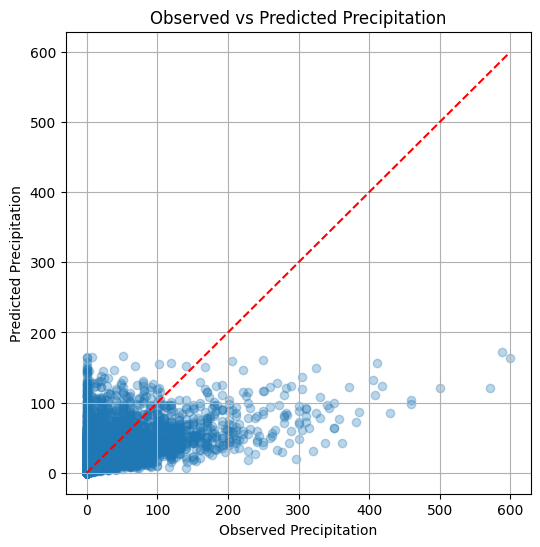

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--')
plt.xlabel("Observed Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Observed vs Predicted Precipitation")
plt.grid(True)
plt.show()

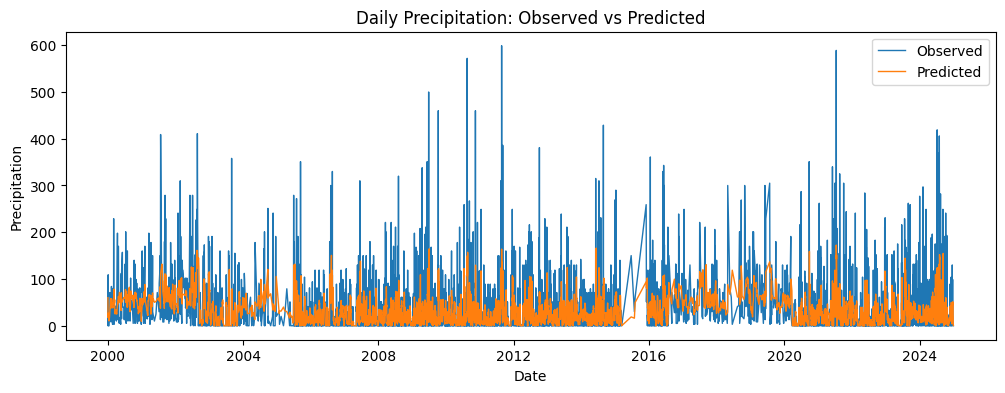

In [24]:
plt.figure(figsize=(12,4))
plt.plot(test['DATE'], y_test.values, label='Observed', linewidth=1)
plt.plot(test['DATE'], y_pred_rf, label='Predicted', linewidth=1)
plt.legend()
plt.title("Daily Precipitation: Observed vs Predicted")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

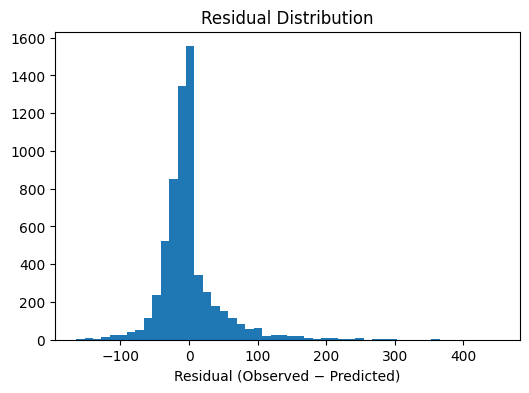

In [25]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=50)
plt.title("Residual Distribution")
plt.xlabel("Residual (Observed − Predicted)")
plt.show()

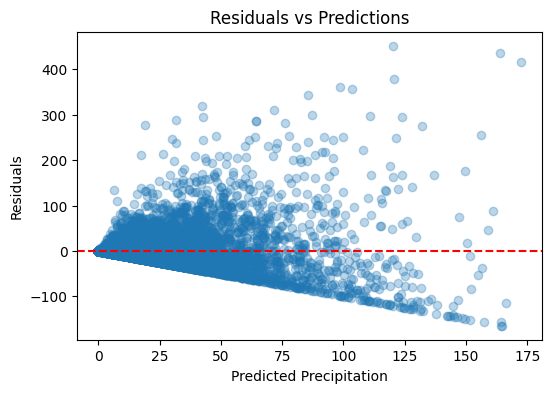

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf, residuals, alpha=0.3)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Precipitation")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()

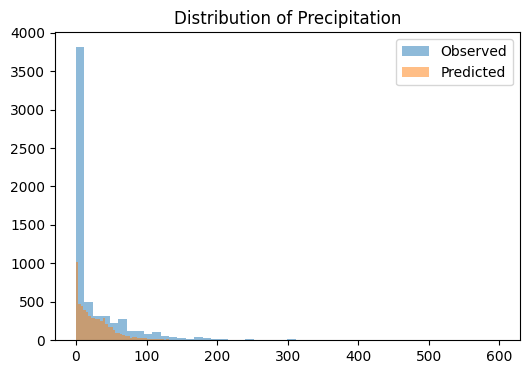

In [27]:
plt.figure(figsize=(6,4))
plt.hist(y_test, bins=50, alpha=0.5, label='Observed')
plt.hist(y_pred_rf, bins=50, alpha=0.5, label='Predicted')
plt.legend()
plt.title("Distribution of Precipitation")
plt.show()

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_11026/3118610986.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = test_copy.resample('M', on='DATE')[['Observed','Predicted']].sum()


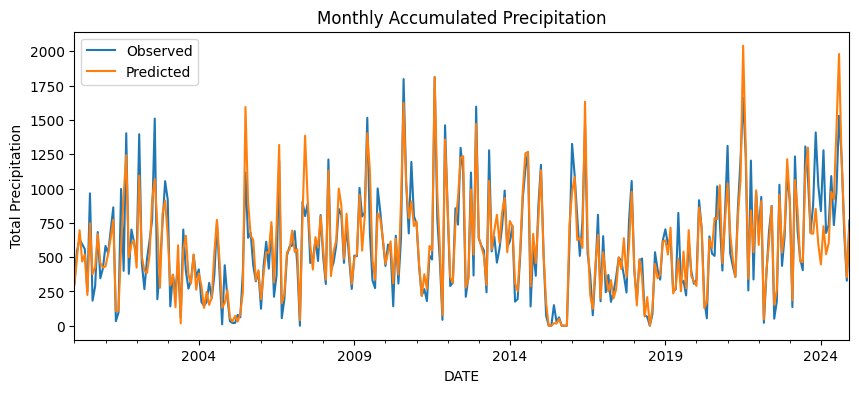

In [28]:
test_copy = test.copy()
test_copy['Observed'] = y_test.values
test_copy['Predicted'] = y_pred_rf

monthly = test_copy.resample('M', on='DATE')[['Observed','Predicted']].sum()

monthly.plot(figsize=(10,4))
plt.title("Monthly Accumulated Precipitation")
plt.ylabel("Total Precipitation")
plt.show()

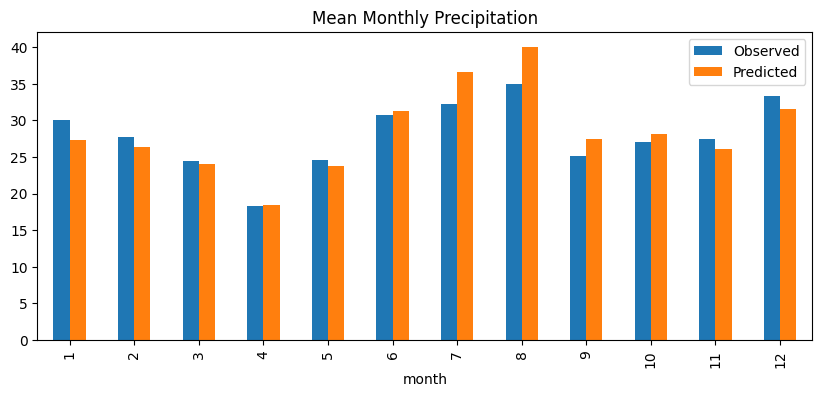

In [29]:
test_copy['month'] = test_copy['DATE'].dt.month

seasonal = test_copy.groupby('month')[['Observed','Predicted']].mean()

seasonal.plot(kind='bar', figsize=(10,4))
plt.title("Mean Monthly Precipitation")
plt.show()

Extreme-event MAE: 142.18220294144527


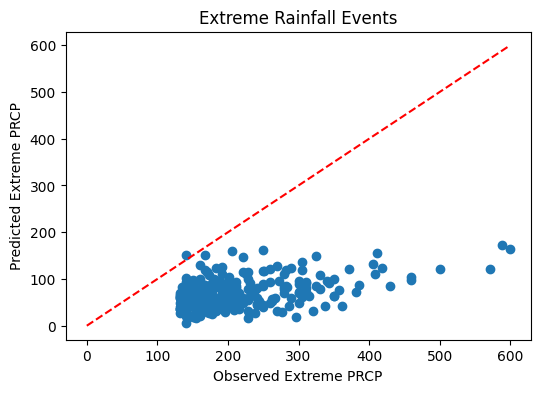

In [30]:
threshold = y_test.quantile(0.95)

extreme_idx = y_test > threshold

print("Extreme-event MAE:",
      mean_absolute_error(y_test[extreme_idx], y_pred_rf[extreme_idx]))
plt.figure(figsize=(6,4))
plt.scatter(y_test[extreme_idx], y_pred_rf[extreme_idx])
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--')
plt.xlabel("Observed Extreme PRCP")
plt.ylabel("Predicted Extreme PRCP")
plt.title("Extreme Rainfall Events")
plt.show()

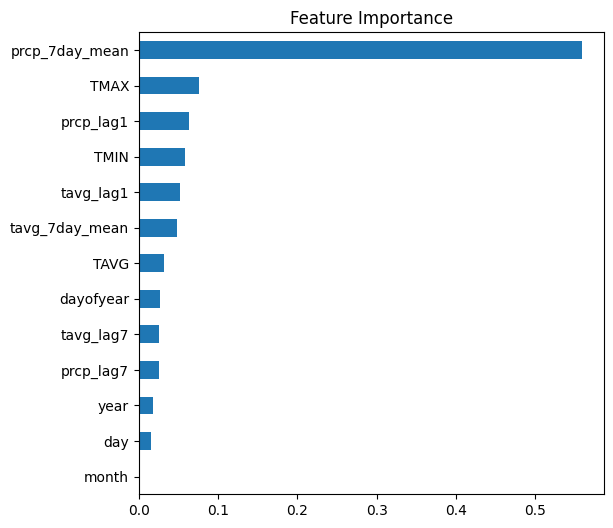

In [31]:
importance = pd.Series(rf.feature_importances_, index=features)
importance.sort_values().plot(kind='barh', figsize=(6,6))
plt.title("Feature Importance")
plt.show()

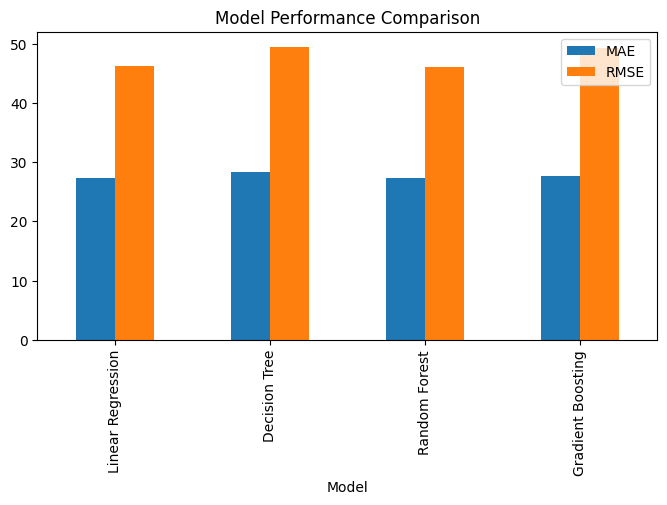

In [32]:
results.set_index("Model")[["MAE","RMSE"]].plot(kind='bar', figsize=(8,4))
plt.title("Model Performance Comparison")
plt.show()

In [33]:
latest = df_model.iloc[-1:][features]

next_day_prcp = rf.predict(latest)

print("Predicted precipitation for next day:", next_day_prcp[0])

Predicted precipitation for next day: 0.5533097243171206


scenario analysis

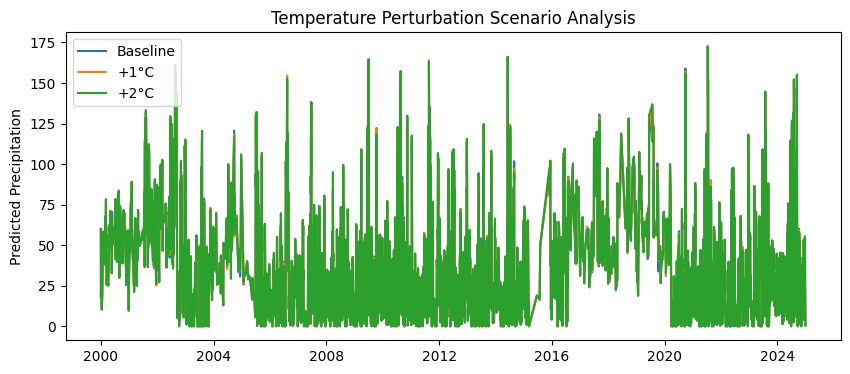

In [34]:
# temperature increase
def temperature_scenario(X, delta):
    X_s = X.copy()
    X_s['TAVG'] += delta
    X_s['TMAX'] += delta
    X_s['TMIN'] += delta
    return X_s
baseline_pred = rf.predict(X_test)

pred_plus1 = rf.predict(temperature_scenario(X_test, 1))
pred_plus2 = rf.predict(temperature_scenario(X_test, 2))
baseline_pred = np.maximum(baseline_pred, 0)
pred_plus1 = np.maximum(pred_plus1, 0)
pred_plus2 = np.maximum(pred_plus2, 0)
plt.figure(figsize=(10,4))
plt.plot(test['DATE'], baseline_pred, label='Baseline')
plt.plot(test['DATE'], pred_plus1, label='+1°C')
plt.plot(test['DATE'], pred_plus2, label='+2°C')
plt.legend()
plt.title("Temperature Perturbation Scenario Analysis")
plt.ylabel("Predicted Precipitation")
plt.show()

In [35]:
print("Mean PRCP (baseline):", baseline_pred.mean())
print("Mean PRCP (+1°C):", pred_plus1.mean())
print("Mean PRCP (+2°C):", pred_plus2.mean())

Mean PRCP (baseline): 28.48550789175615
Mean PRCP (+1°C): 28.578363606276174
Mean PRCP (+2°C): 28.665918118007433


In [36]:
# wet vs dry history (persistence)
X_dry = X_test.copy()
X_dry[['prcp_lag1','prcp_lag7','prcp_7day_mean']] = 0

X_wet = X_test.copy()
X_wet[['prcp_lag1','prcp_lag7','prcp_7day_mean']] *= 2
pred_dry = np.maximum(rf.predict(X_dry), 0)
pred_wet = np.maximum(rf.predict(X_wet), 0)
print("Dry-history mean PRCP:", pred_dry.mean())
print("Wet-history mean PRCP:", pred_wet.mean())

Dry-history mean PRCP: 0.0
Wet-history mean PRCP: 47.0231531483463


/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_11026/3277421773.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pred_winter, pred_summer],


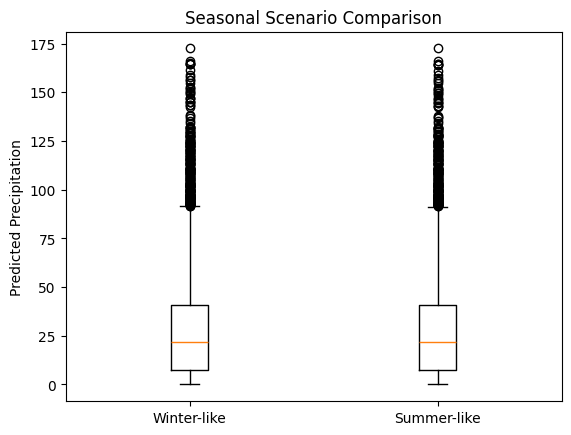

In [37]:
# seasonal scenario
X_winter = X_test.copy()
X_winter['month'] = 1

X_summer = X_test.copy()
X_summer['month'] = 7

pred_winter = rf.predict(X_winter)
pred_summer = rf.predict(X_summer)
plt.boxplot([pred_winter, pred_summer],
            labels=['Winter-like','Summer-like'])
plt.title("Seasonal Scenario Comparison")
plt.ylabel("Predicted Precipitation")
plt.show()

In [38]:
# extreme temperature test
X_extreme_cold = temperature_scenario(X_test, -5)
X_extreme_hot  = temperature_scenario(X_test, +5)

pred_cold = rf.predict(X_extreme_cold)
pred_hot  = rf.predict(X_extreme_hot)
np.percentile(pred_cold, 95), np.percentile(pred_hot, 95)

(83.46074920488492, 84.15788829014754)

# Temperature modelling
data preparation

In [39]:
# Download latest version
path = kagglehub.dataset_download("sujaykapadnis/global-surface-temperatures")

print("Path to dataset files:", path)
file_path = os.path.join(path, "global_temps.csv")
dft = pd.read_csv(file_path)

dft.head()

Path to dataset files: /Users/yashikasharma/.cache/kagglehub/datasets/sujaykapadnis/global-surface-temperatures/versions/1


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.25,-0.09,-0.17,-0.10,-0.21,-0.18,-0.11,-0.15,-0.24,-0.22,-0.18,-0.17,NaN,NaN,-0.12,-0.17,-0.20
1,1881,-0.20,-0.15,0.03,0.05,0.05,-0.19,0.00,-0.04,-0.16,-0.22,-0.19,-0.08,-0.09,-0.10,-0.18,0.04,-0.08,-0.19
2,1882,0.16,0.13,0.04,-0.16,-0.14,-0.22,-0.17,-0.08,-0.15,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.09,-0.16,-0.19
3,1883,-0.30,-0.37,-0.13,-0.19,-0.18,-0.08,-0.08,-0.14,-0.23,-0.12,-0.24,-0.11,-0.18,-0.20,-0.34,-0.17,-0.10,-0.20
4,1884,-0.13,-0.09,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.28,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.32,-0.29


Data preprocessing

In [40]:
dft = dft[['Year','Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec','J-D']]
dft.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D
0,1880,-0.19,-0.25,-0.09,-0.17,-0.10,-0.21,-0.18,-0.11,-0.15,-0.24,-0.22,-0.18,-0.17
1,1881,-0.20,-0.15,0.03,0.05,0.05,-0.19,0.00,-0.04,-0.16,-0.22,-0.19,-0.08,-0.09
2,1882,0.16,0.13,0.04,-0.16,-0.14,-0.22,-0.17,-0.08,-0.15,-0.24,-0.17,-0.36,-0.11
3,1883,-0.30,-0.37,-0.13,-0.19,-0.18,-0.08,-0.08,-0.14,-0.23,-0.12,-0.24,-0.11,-0.18
4,1884,-0.13,-0.09,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.28,-0.25,-0.34,-0.31,-0.29


In [41]:
dft.isna().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
dtype: int64

In [42]:
dft = dft.dropna()
dft.isna().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
dtype: int64

feature engineering

In [43]:
dft['lag_1'] = dft['J-D'].shift(1)
dft['lag_2'] = dft['J-D'].shift(2)
dft['lag_5'] = dft['J-D'].shift(5)

dft = dft.dropna()

X = dft[['Year','lag_1','lag_2','lag_5']]
y = dft['J-D']

In [44]:
# Shift December for DJF
dft['Dec_prev'] = dft['Dec'].shift(1)

dft['DJF'] = dft[['Dec_prev','Jan','Feb']].mean(axis=1)
dft['MAM'] = dft[['Mar','Apr','May']].mean(axis=1)
dft['JJA'] = dft[['Jun','Jul','Aug']].mean(axis=1)
dft['SON'] = dft[['Sep','Oct','Oct','Nov']].mean(axis=1)

In [45]:
dft.drop(columns=['Dec_prev'], inplace=True)

data visualisation and exploration

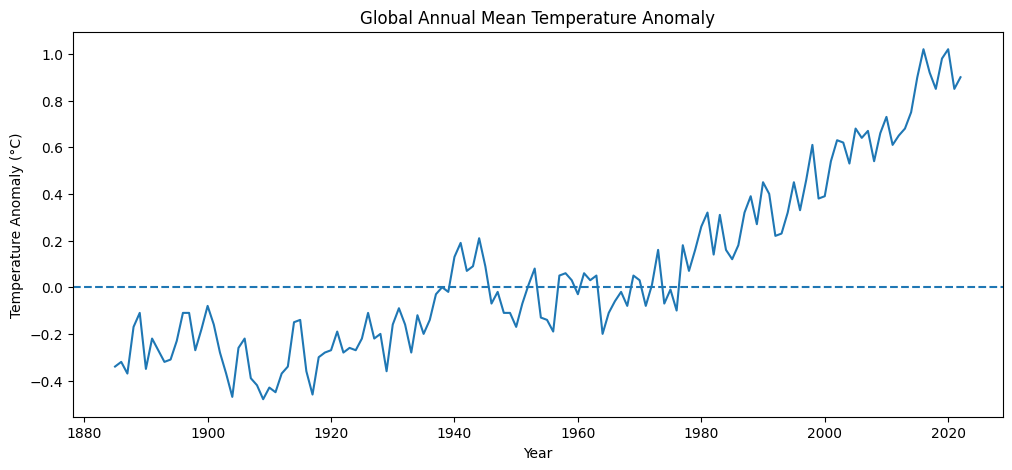

In [46]:
plt.figure(figsize=(12,5))
plt.plot(dft['Year'], dft['J-D'])
plt.axhline(0, linestyle='--')

plt.title("Global Annual Mean Temperature Anomaly")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()

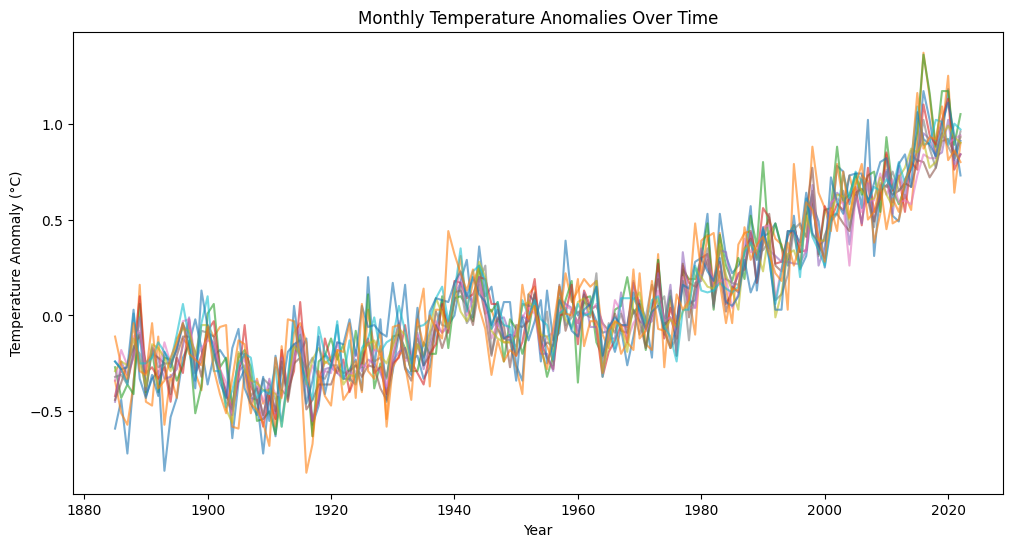

In [47]:
months = ['Jan','Feb','Mar','Apr','May','Jun',
          'Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(12,6))
for m in months:
    plt.plot(dft['Year'], dft[m], alpha=0.6)

plt.title("Monthly Temperature Anomalies Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()

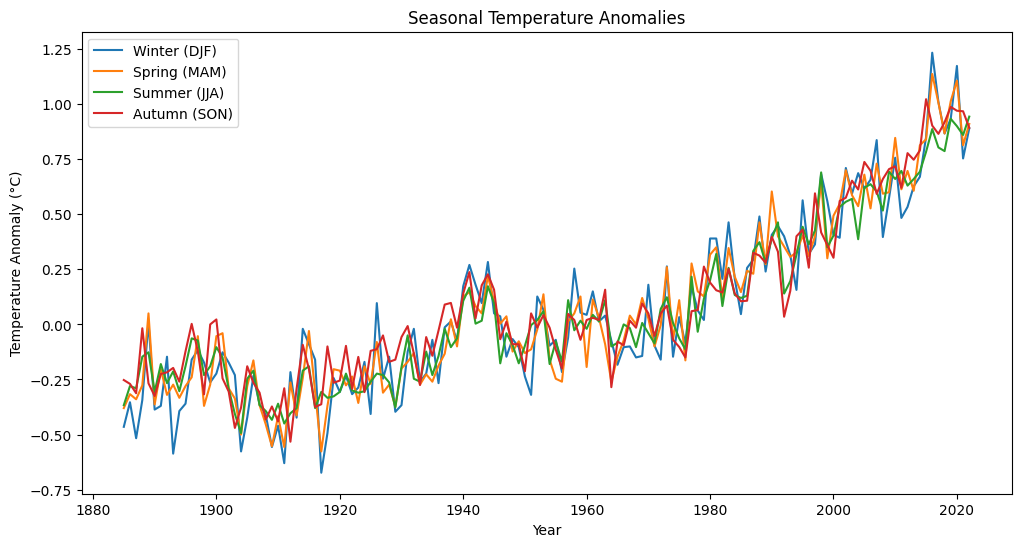

In [48]:
plt.figure(figsize=(12,6))

plt.plot(dft['Year'], dft['DJF'], label='Winter (DJF)')
plt.plot(dft['Year'], dft['MAM'], label='Spring (MAM)')
plt.plot(dft['Year'], dft['JJA'], label='Summer (JJA)')
plt.plot(dft['Year'], dft['SON'], label='Autumn (SON)')

plt.legend()
plt.title("Seasonal Temperature Anomalies")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()

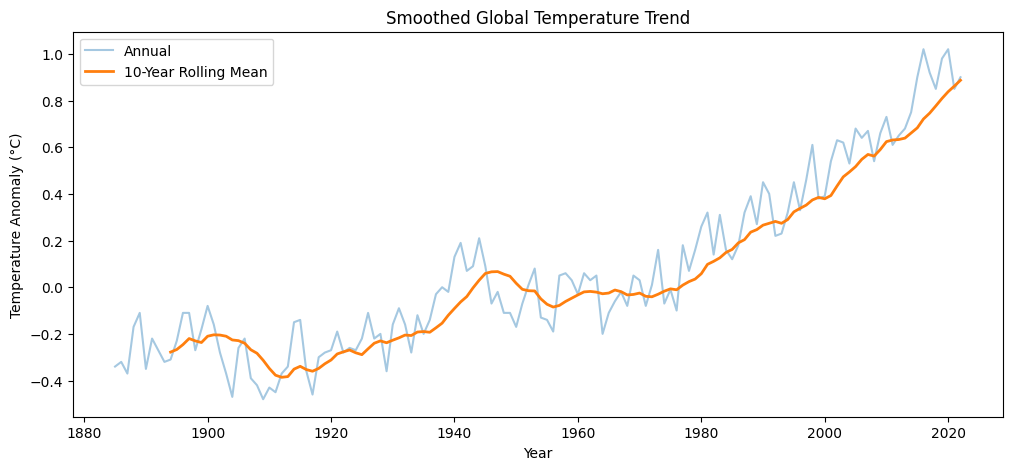

In [49]:
dft['rolling_10'] = dft['J-D'].rolling(window=10).mean()

plt.figure(figsize=(12,5))
plt.plot(dft['Year'], dft['J-D'], alpha=0.4, label='Annual')
plt.plot(dft['Year'], dft['rolling_10'], linewidth=2, label='10-Year Rolling Mean')

plt.legend()
plt.title("Smoothed Global Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()

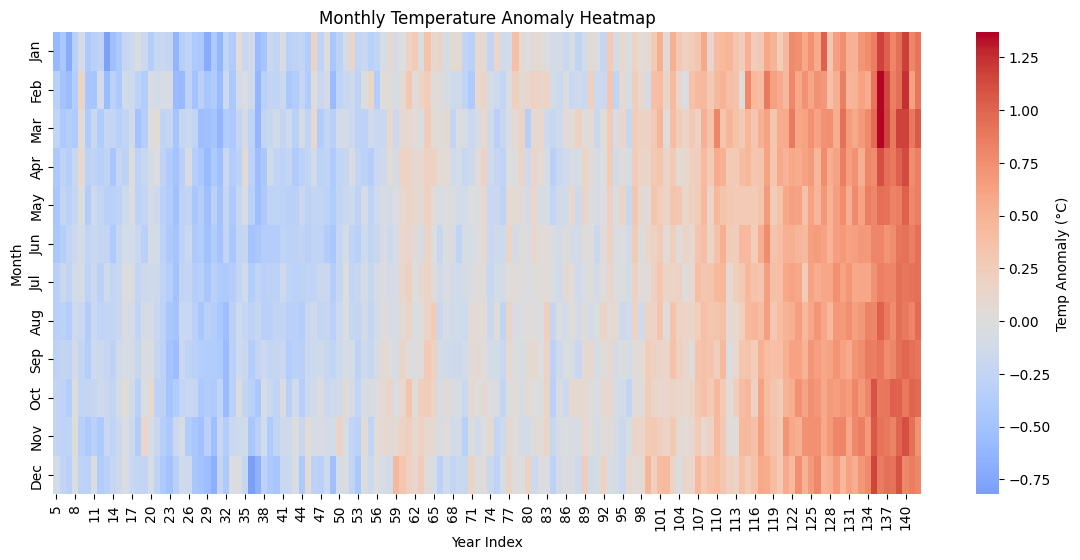

In [50]:
plt.figure(figsize=(14,6))
sns.heatmap(dft[months].T, cmap='coolwarm', center=0,
            cbar_kws={'label': 'Temp Anomaly (°C)'})

plt.title("Monthly Temperature Anomaly Heatmap")
plt.xlabel("Year Index")
plt.ylabel("Month")
plt.show()

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_11026/2019385202.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_1950, post_1950], labels=['Before 1950','After 1950'])


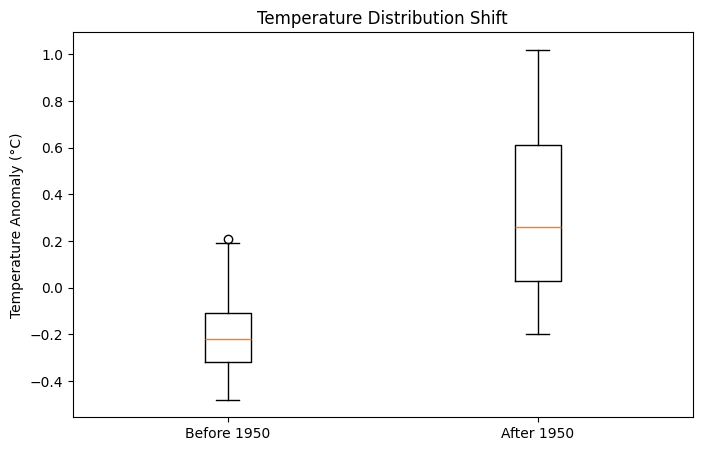

In [51]:
pre_1950 = dft[dft['Year'] < 1950]['J-D']
post_1950 = dft[dft['Year'] >= 1950]['J-D']

plt.figure(figsize=(8,5))
plt.boxplot([pre_1950, post_1950], labels=['Before 1950','After 1950'])
plt.title("Temperature Distribution Shift")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()

model selection, training and evaluation

In [52]:
split_year = 1980

X_train = X[dft['Year'] <= split_year]
X_test  = X[dft['Year'] > split_year]
y_train = y[dft['Year'] <= split_year]
y_test  = y[dft['Year'] > split_year]

In [53]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

results = evaluate(y_test, y_pred_lr, "Linear Regression")
results

,Model,MAE,RMSE,R2
0,Linear Regression,0.163061,0.189219,0.439678


In [54]:
dt.fit(X_train, y_train)
y_pred_dt = np.maximum(dt.predict(X_test), 0)

results = pd.concat([results,
                     evaluate(y_test, y_pred_dt, "Decision Tree")])
results

,Model,MAE,RMSE,R2
0,Linear Regression,0.163061,0.189219,0.439678
0,Decision Tree,0.495714,0.556445,-3.845677


In [55]:
rf.fit(X_train, y_train)
y_pred_rf = np.maximum(rf.predict(X_test), 0)

results = pd.concat([results,
                     evaluate(y_test, y_pred_rf, "Random Forest")])
results

,Model,MAE,RMSE,R2
0,Linear Regression,0.163061,0.189219,0.439678
0,Decision Tree,0.495714,0.556445,-3.845677
0,Random Forest,0.541068,0.597205,-4.581568


In [56]:
gbr.fit(X_train, y_train)
y_pred_gbr = np.maximum(gbr.predict(X_test), 0)

results = pd.concat([results,
                     evaluate(y_test, y_pred_gbr, "Gradient Boosting")])
results

,Model,MAE,RMSE,R2
0,Linear Regression,0.163061,0.189219,0.439678
0,Decision Tree,0.495714,0.556445,-3.845677
0,Random Forest,0.541068,0.597205,-4.581568
0,Gradient Boosting,0.428310,0.500887,-2.926360


In [57]:
results.sort_values("MAE")

,Model,MAE,RMSE,R2
0,Linear Regression,0.163061,0.189219,0.439678
0,Gradient Boosting,0.428310,0.500887,-2.926360
0,Decision Tree,0.495714,0.556445,-3.845677
0,Random Forest,0.541068,0.597205,-4.581568


furure predictions

In [58]:
future_years = np.arange(dft['Year'].max()+1, dft['Year'].max()+11)

last = dft.iloc[-1]
future_df = pd.DataFrame({
    'Year': future_years,
    'lag_1': last['J-D'],
    'lag_2': last['lag_1'],
    'lag_5': last['lag_5']
})

future_preds = lr.predict(future_df)
future_preds

array([0.66863014, 0.67048257, 0.67233499, 0.67418742, 0.67603984,
       0.67789226, 0.67974469, 0.68159711, 0.68344954, 0.68530196])

scenario analysis

In [59]:
X = dft[['Year']]
y = dft['J-D']

model = LinearRegression()
model.fit(X, y)

trend_slope = model.coef_[0]
trend_intercept = model.intercept_

trend_slope, trend_intercept

(0.008320779745610052, -16.18616497217967)

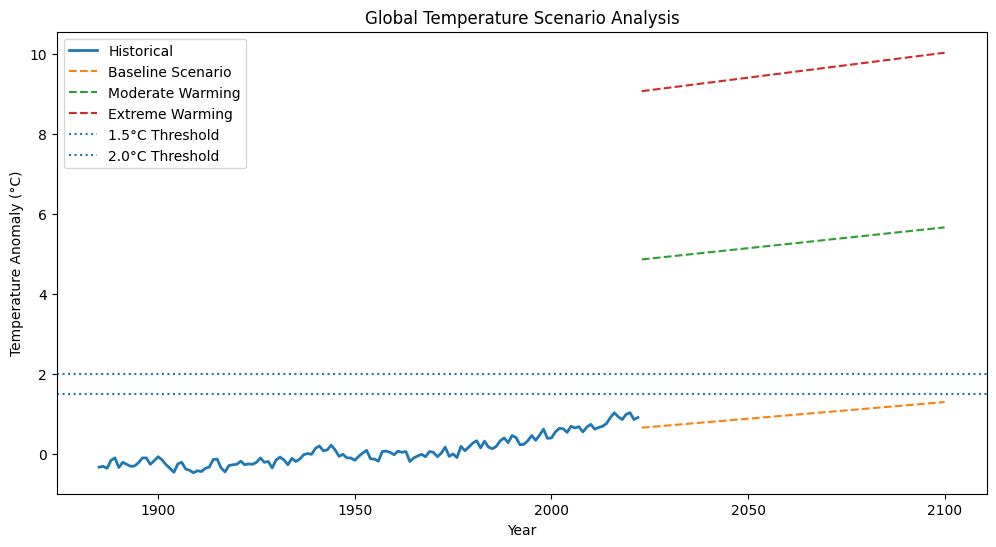

In [60]:
future_years = np.arange(dft['Year'].max()+1, 2101)
future_X = future_years.reshape(-1, 1)
# Baseline (historical trend)
baseline = trend_intercept + trend_slope * future_years

# Moderate warming (25% faster)
moderate = trend_intercept + (trend_slope * 1.25) * future_years

# Extreme warming (50% faster)
extreme = trend_intercept + (trend_slope * 1.50) * future_years

plt.figure(figsize=(12,6))

# Historical
plt.plot(dft['Year'], dft['J-D'], label='Historical', linewidth=2)

# Scenarios
plt.plot(future_years, baseline, linestyle='--', label='Baseline Scenario')
plt.plot(future_years, moderate, linestyle='--', label='Moderate Warming')
plt.plot(future_years, extreme, linestyle='--', label='Extreme Warming')

plt.axhline(1.5, linestyle=':', label='1.5°C Threshold')
plt.axhline(2.0, linestyle=':', label='2.0°C Threshold')

plt.legend()
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Global Temperature Scenario Analysis")
plt.show()

In [61]:
def crossing_year(values, years, threshold):
    for v, y in zip(values, years):
        if v >= threshold:
            return y
    return None

for name, scenario in {
    "Baseline": baseline,
    "Moderate": moderate,
    "Extreme": extreme
}.items():
    print(name,
          "1.5°C:", crossing_year(scenario, future_years, 1.5),
          "2.0°C:", crossing_year(scenario, future_years, 2.0))

Baseline 1.5°C: None 2.0°C: None
Moderate 1.5°C: 2023 2.0°C: 2023
Extreme 1.5°C: 2023 2.0°C: 2023


In [62]:
last_year = dft['Year'].max()
last_temp = dft[dft['Year'] == last_year]['J-D'].values[0]

future_preds = []
current_temp = last_temp

for year in future_years:
    pred = model.predict([[year]])[0]
    future_preds.append(pred)
future_preds

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not

[0.6467724531894632,
 0.6550932329350729,
 0.6634140126806827,
 0.6717347924262924,
 0.6800555721719022,
 0.6883763519175119,
 0.6966971316631216,
 0.7050179114087314,
 0.7133386911543447,
 0.7216594708999544,
 0.7299802506455642,
 0.7383010303911739,
 0.7466218101367836,
 0.7549425898823934,
 0.7632633696280031,
 0.7715841493736129,
 0.7799049291192226,
 0.7882257088648323,
 0.7965464886104421,
 0.8048672683560518,
 0.8131880481016651,
 0.8215088278472749,
 0.8298296075928846,
 0.8381503873384943,
 0.8464711670841041,
 0.8547919468297138,
 0.8631127265753236,
 0.8714335063209333,
 0.879754286066543,
 0.8880750658121528,
 0.8963958455577625,
 0.9047166253033758,
 0.9130374050489856,
 0.9213581847945953,
 0.929678964540205,
 0.9379997442858148,
 0.9463205240314245,
 0.9546413037770343,
 0.962962083522644,
 0.9712828632682537,
 0.9796036430138635,
 0.9879244227594732,
 0.996245202505083,
 1.0045659822506963,
 1.012886761996306,
 1.0212075417419157,
 1.0295283214875255,
 1.037849101233135

# sea level modelling
data preparation

In [63]:
# Download latest version
path = kagglehub.dataset_download("agrkushal/global-mean-sea-level")

print("Path to dataset files:", path)
file_path = os.path.join(path, "gslr.csv")
dfs = pd.read_csv(file_path)

dfs.head()

Path to dataset files: /Users/yashikasharma/.cache/kagglehub/datasets/agrkushal/global-mean-sea-level/versions/1


,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2


data preprocessing

In [64]:
dfs['Time'] = pd.to_datetime(dfs['Time'])
dfs = dfs.sort_values('Time')

# Create time index in years since start
dfs['t'] = (dfs['Time'] - dfs['Time'].min()).dt.days / 365.25
dfs.head()

,Time,GMSL,GMSL uncertainty,t
0,1880-01-15,-183.0,24.2,0.000000
1,1880-02-15,-171.1,24.2,0.084873
2,1880-03-15,-164.3,24.2,0.164271
3,1880-04-15,-158.2,24.2,0.249144
4,1880-05-15,-158.7,24.2,0.331280


data visualisation and exploration

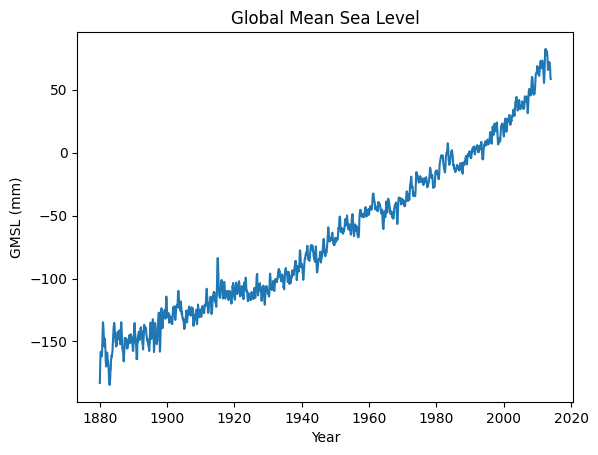

In [65]:
plt.figure()
plt.plot(dfs['Time'], dfs['GMSL'])
plt.xlabel("Year")
plt.ylabel("GMSL (mm)")
plt.title("Global Mean Sea Level")
plt.show()

model selection, training and evaluation

In [66]:
# Features & target
X = dfs[['t']]
y = dfs['GMSL']

# 80–20 split
split_idx = int(0.8 * len(dfs))

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

results = evaluate(y_test, y_pred_lr, "Linear Regression")
results

,Model,MAE,RMSE,R2
0,Linear Regression,20.221957,24.93266,0.027779


In [67]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

results = pd.concat([results,
                     evaluate(y_test, y_pred_poly, "Quadratic Regression")])
results

,Model,MAE,RMSE,R2
0,Linear Regression,20.221957,24.93266,0.027779
0,Quadratic Regression,7.561524,9.83088,0.848849


In [68]:
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

results = pd.concat([results,
                     evaluate(y_test, y_pred_rf, "Random Forest")])
results

,Model,MAE,RMSE,R2
0,Linear Regression,20.221957,24.932660,0.027779
0,Quadratic Regression,7.561524,9.830880,0.848849
0,Random Forest,37.290994,44.945955,-2.159431


In [69]:
arima = ARIMA(y_train, order=(2,1,2))
arima_fit = arima.fit()

y_pred_arima = arima_fit.forecast(steps=len(y_test))

results = pd.concat([results,
                     evaluate(y_test, y_pred_arima, "ARIMA")])
results

,Model,MAE,RMSE,R2
0,Linear Regression,20.221957,24.932660,0.027779
0,Quadratic Regression,7.561524,9.830880,0.848849
0,Random Forest,37.290994,44.945955,-2.159431
0,ARIMA,34.516100,42.482631,-1.822607


In [70]:
results.sort_values("MAE")

,Model,MAE,RMSE,R2
0,Quadratic Regression,7.561524,9.830880,0.848849
0,Linear Regression,20.221957,24.932660,0.027779
0,ARIMA,34.516100,42.482631,-1.822607
0,Random Forest,37.290994,44.945955,-2.159431


future prediction

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_11026/1340404252.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(dfs['Time'].max(), periods=len(future_gmsl), freq='M'),


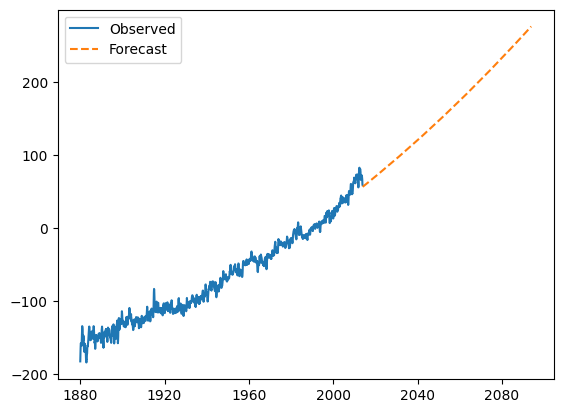

In [71]:
future_years = np.arange(dfs['t'].max(), dfs['t'].max() + 80, 1/12)
future_X = future_years.reshape(-1,1)

future_X_poly = poly.transform(future_X)
future_gmsl = lr_poly.predict(future_X_poly)

plt.figure()
plt.plot(dfs['Time'], dfs['GMSL'], label="Observed")
plt.plot(pd.date_range(dfs['Time'].max(), periods=len(future_gmsl), freq='M'),
         future_gmsl, label="Forecast", linestyle='--')
plt.legend()
plt.show()

sceanario analysis

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_11026/4270088270.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


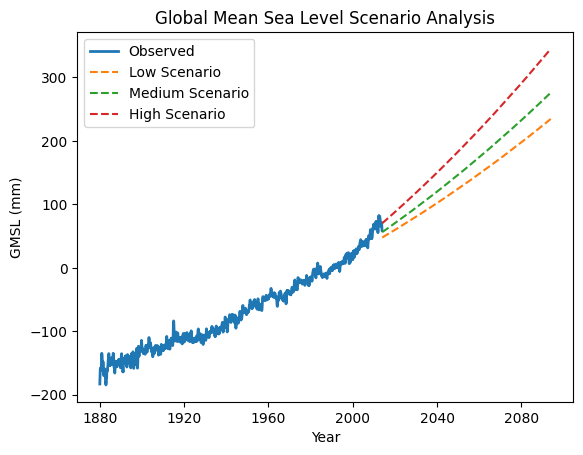

In [72]:
# Base future timeline (e.g., next 80 years)
future_t = np.arange(
    X['t'].max(),
    X['t'].max() + 80,
    1/12
).reshape(-1, 1)

future_t_poly = poly.transform(future_t)

# Baseline prediction
gmsl_base = lr_poly.predict(future_t_poly)

gmsl_low = gmsl_base * 0.85
gmsl_medium = gmsl_base
gmsl_high = gmsl_base * 1.25

future_dates = pd.date_range(
    start=dfs['Time'].max(),
    periods=len(future_t),
    freq='M'
)

plt.figure()
plt.plot(dfs['Time'], dfs['GMSL'], label="Observed", linewidth=2)

plt.plot(future_dates, gmsl_low, label="Low Scenario", linestyle="--")
plt.plot(future_dates, gmsl_medium, label="Medium Scenario", linestyle="--")
plt.plot(future_dates, gmsl_high, label="High Scenario", linestyle="--")

plt.xlabel("Year")
plt.ylabel("GMSL (mm)")
plt.title("Global Mean Sea Level Scenario Analysis")
plt.legend()
plt.show()

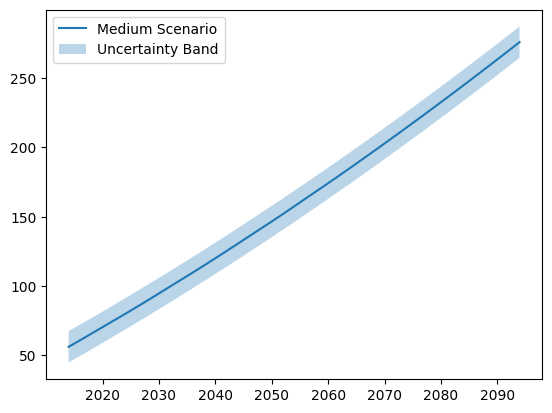

In [73]:
uncertainty = dfs['GMSL uncertainty'].mean()

plt.figure()
plt.plot(future_dates, gmsl_medium, label="Medium Scenario")

plt.fill_between(
    future_dates,
    gmsl_medium - uncertainty,
    gmsl_medium + uncertainty,
    alpha=0.3,
    label="Uncertainty Band"
)

plt.legend()
plt.show()

In [74]:
# Sea level rise by 2100
print("Low Scenario rise (mm):", gmsl_low[-1] - dfs['GMSL'].iloc[-1])
print("Medium Scenario rise (mm):", gmsl_medium[-1] - dfs['GMSL'].iloc[-1])
print("High Scenario rise (mm):", gmsl_high[-1] - dfs['GMSL'].iloc[-1])

Low Scenario rise (mm): 176.02210387922725
Medium Scenario rise (mm): 217.40835750497325
High Scenario rise (mm): 286.3854468812166
